In [1]:
#using Revise
using Falcons

using PyCall
using PyPlot
hp = pyimport("healpy")

┌ Info: Precompiling Falcons [eba0fb4b-2daf-4740-90d2-e5655143e0a0]
└ @ Base loading.jl:1278
┌ Info: Precompiling PyCall [438e738f-606a-5dbb-bf0a-cddfbfd45ab0]
└ @ Base loading.jl:1278
┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1278


PyObject <module 'healpy' from '/home/cmb/yusuket/.julia/conda/3/lib/python3.8/site-packages/healpy/__init__.py'>

In [6]:
day = 60 * 60 * 24
year = day * 365

#= Scan strategy parameter setting=#
ss = scan_strategy()
ss.nside = 128
ss.times = year #[sec]
ss.sampling_rate = 1 #[Hz]
ss.FP_theta = [0.0, 5.0] #[1st_detector, 2nd_det]
ss.FP_phi = [0.0, 0.0] #[1st_detector, 2nd_det]
ss.alpha = 55 #[degree]
ss.beta = 60 #[degree]
ss.prec_period = 180.22 #[sec]
ss.spin_rpm = 0.04 #[rpm]
ss.hwp_rpm = 0.05 #[rpm]
ss.start_point = "pole" #You can choose "pole" or "equator"

"pole"

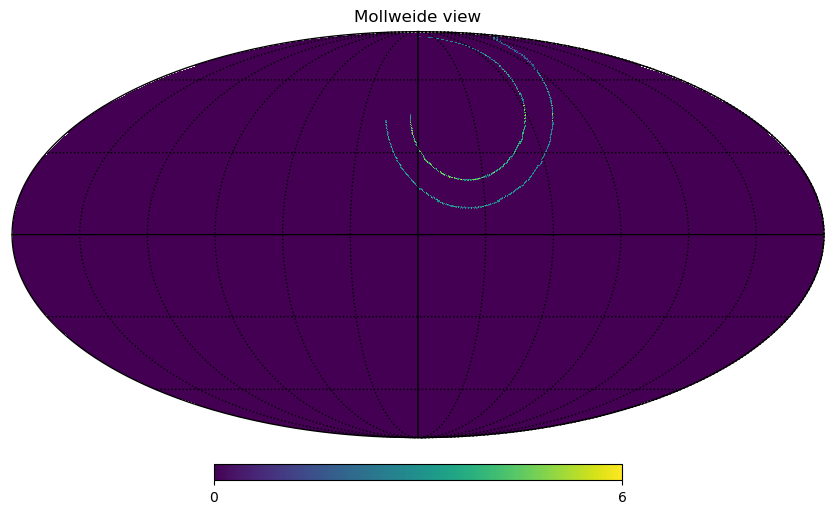

In [7]:
theta, phi, psi= get_scan_tod(ss, 0, 1000)
temp_map_bore = HitMap(ss.nside, theta, phi)
hp.mollview(temp_map_bore, rot=(0,0), cmap="viridis")
hp.graticule()

process=1/2
Start mapmaking!
process=2/2


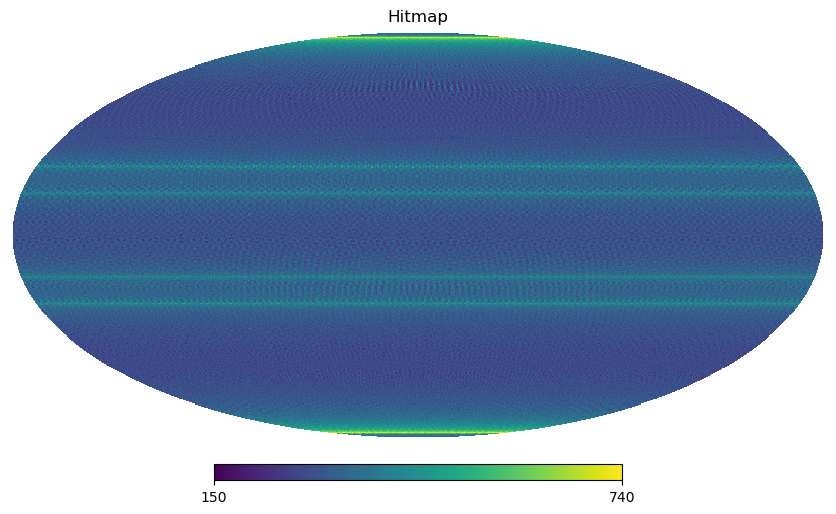

Start mapmaking!


In [10]:
outmap = Mapmaking(ss)
hp.mollview(outmap[1], title="Hitmap")

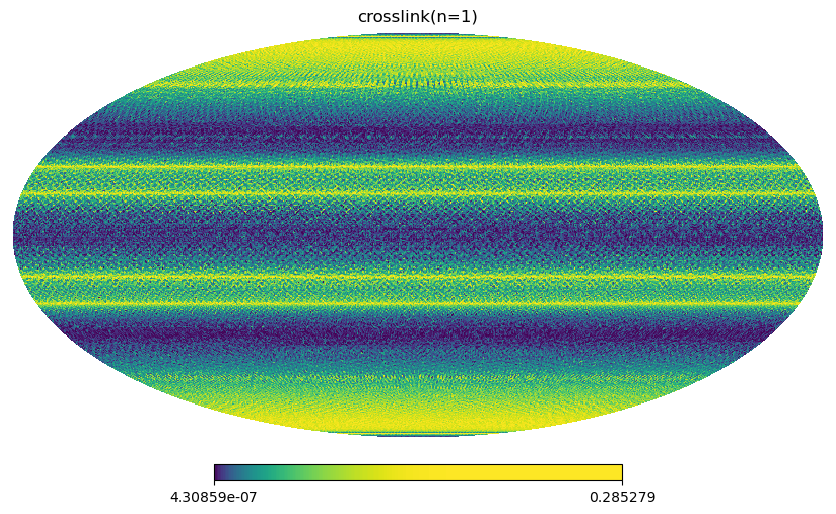

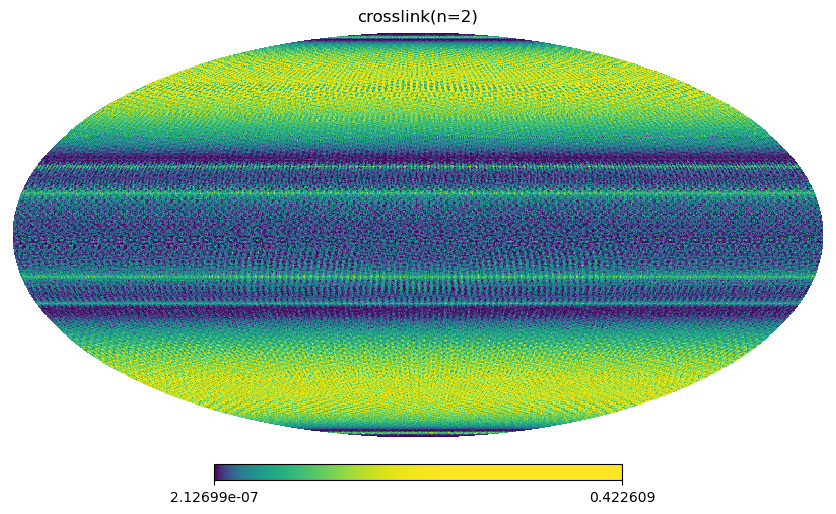

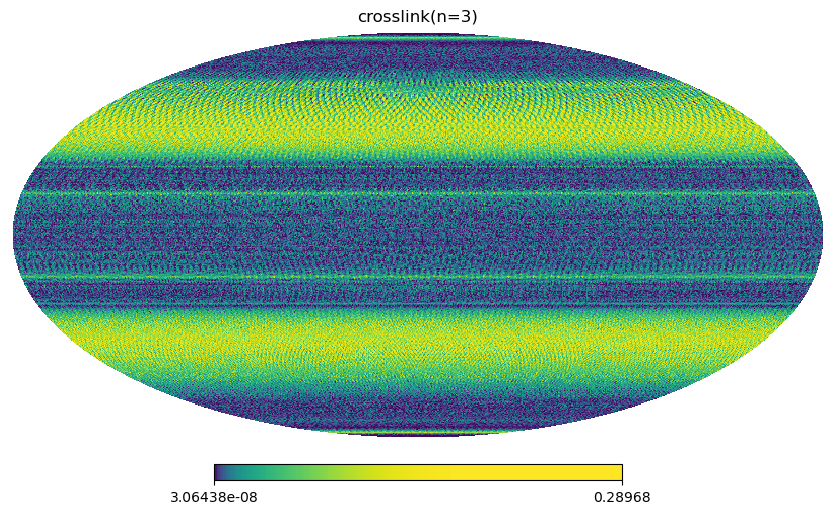

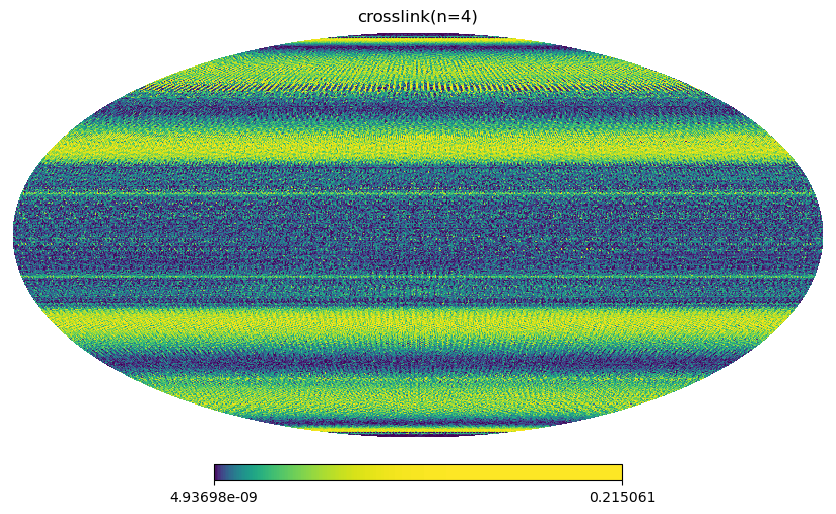

In [12]:
hp.mollview(outmap[2], title="crosslink(n=1)", norm="hist")
hp.mollview(outmap[3], title="crosslink(n=2)", norm="hist")
hp.mollview(outmap[4], title="crosslink(n=3)", norm="hist")
hp.mollview(outmap[5], title="crosslink(n=4)", norm="hist")